# Q1 What are the differences among vector, matrix, data frame, and factor

## Vectors
### Basic datatype in R. All values in a vector must have the same mode (Integer, String, etc). 

In [366]:
#simple numeric vector in R
test_vector <- c(1,2,3,4)
test_vector

[1] 1 2 3 4

## Matrices
### Multi dimensional, each row of a matrix is a vector. All elements of a matrix must have the same mode. 

In [367]:
# you can insert a vector to a matrix by rows. we'll add the previously created vector to the matrix
cells = test_vector
cols = c("C1","C2")
rows = c("R1", "R2")

#a has 4 values and the matrix below is 2 * 2. Set byrow to TRUE to add each element of a vector row wise 
test_matrix = matrix(cells, nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(rows, cols))
test_matrix

,C1,C2
R1,1,2
R2,3,4


In [3]:
#Access first column of the matrix. They're all integers
test_matrix[,1]

R1 R2 
 1  3

In [4]:
#Let's insert another column of just strings to the matrix which has only integers
test_matrix = cbind(test_matrix, airport = c("PHX","SFO"))
test_matrix

,C1,C2,airport
R1,1,2,PHX
R2,3,4,SFO


In [5]:
#now when we try to access the first column, we see that the integers have been type-casted to chr
#which is undesirable
test_matrix[,1]

R1  R2 
"1" "3"

## Factors 
### vectors used to represent categories. Can be used for statistical modeling and classification. Factor is simply a vector whose unique values are called 'levels' which signify nominal or categorical data.

In [6]:
#create a regular vector with redundant values and check if it's a factor. 
data = c("Student", "Student","Prof","RA","TA","RA","Student","TA","Prof")
is.factor(data)

[1] FALSE

In [7]:
#convert data to a factor type and print levels (categories)
factor_data = factor(data)
factor_data

[1] Student Student Prof    RA      TA      RA      Student TA      Prof   
Levels: Prof RA Student TA

## Dataframes
### Dataframes are similar to matrics except each column can be of a different type. one column's mode will not affect the rest of the columns. Columns can be of mode Integer, Chr and Factors

In [8]:
#insert 3 columns. names(char), id(int), gender(factor)
names = c("John", "Mary", "Anna")
id = c(3, 6, 9)
gender = factor(c('M', 'F', 'F'))
test_df = data.frame(id, names, gender, stringsAsFactors = F)

#when printing the dataframe, we see each column has retained its original mode
test_df

id,names,gender
<dbl>,<chr>,<fct>
3,John,M
6,Mary,F
9,Anna,F


---

# ggplot Do it yourself questions

In [350]:
library(ggplot2)
library(gdata)
library(ggrepel)

In [358]:
sample_file = read.csv("sample.csv")
sample_file$player2 = NA

#adding player 2 column to each row
for (i in 1:nrow(sample_file)){
    p_year = sample_file[i,]$year
    p_player = sample_file[i,]$player
    player_2 = as.character(subset(sample_file, sample_file$year == p_year & sample_file$player != p_player)$player)
    sample_file[i,]$player2 = player_2
}

p = ggplot(sample_file, aes(winner, error))

## set figure background to white

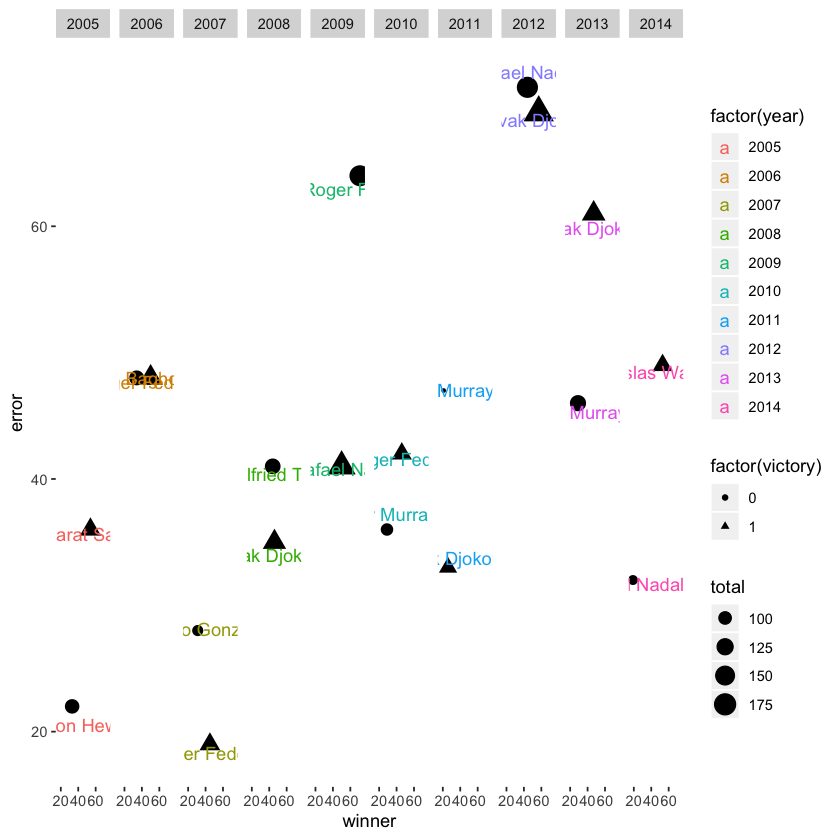

In [354]:
p + geom_point(aes(shape=factor(victory), size=total)) +
    geom_text(aes(colour=factor(year),label=player), position = position_jitter(width=5, height=1.5)) + 
    facet_grid(~year) +
    theme(panel.background = element_rect(fill='white')) #setting background to white with theme function

## Connect each pair by year with a line

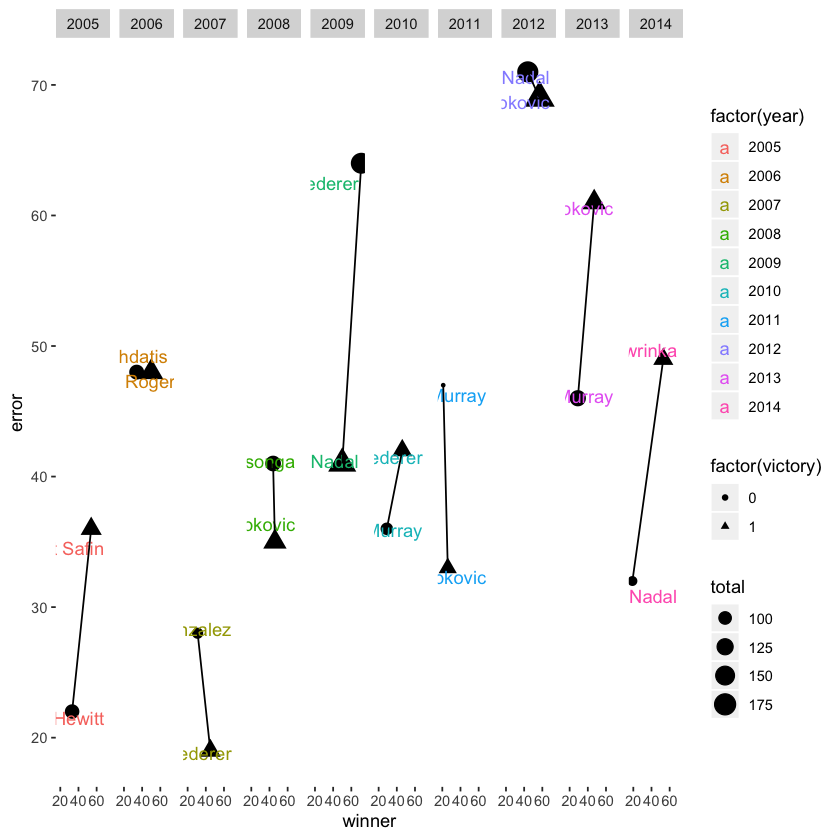

In [12]:
p + geom_point(aes(shape=factor(victory), size=total)) +
    geom_text_repel(aes(colour=factor(year),label=player), 
              position = position_jitter(width=5, height=1.5)) + 
    facet_grid(~year) +
    theme(panel.background = element_rect(fill='white')) +
    geom_line() #line between each point by year

## Generate charts not by variable, by columns

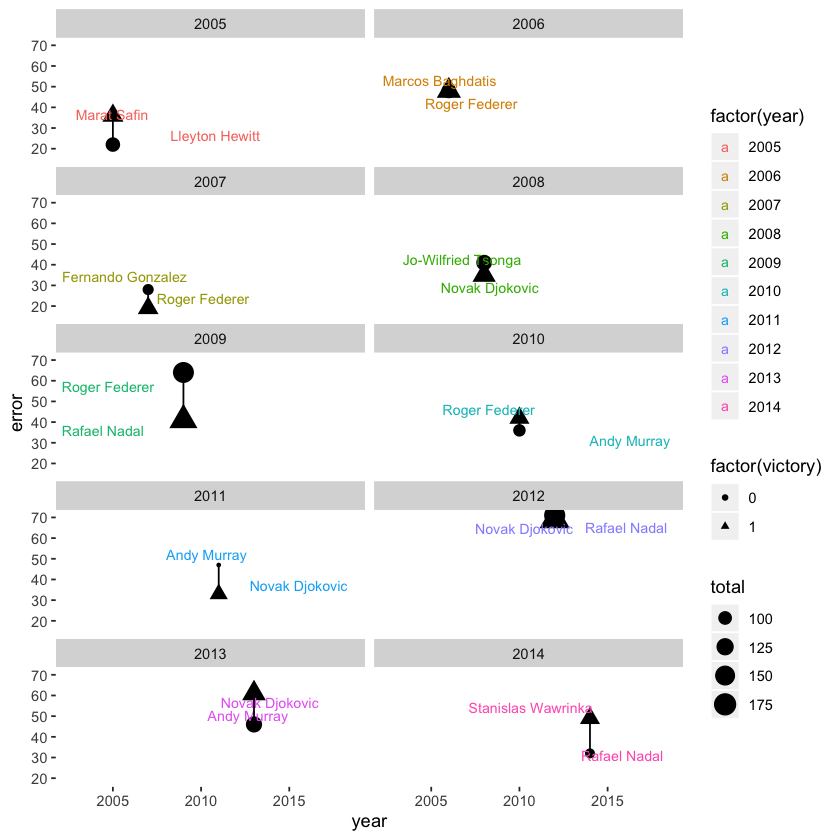

In [368]:
p + 
geom_point(aes(shape=factor(victory), size=total)) +
geom_text_repel(aes(colour=factor(year),label=player), 
          position = position_jitter(width=5, height=1.5), 
          size=3) + 
facet_wrap(~year, ncol = 2) + #facet wrap with year and set columns to 2 to get sub charts
theme(panel.background = element_rect(fill='white')) +
geom_line()

# Q2 Come up with another assumption and vision the outcome may be in a similar comparative small multiples chart?

## Set x=year and y=winner and each subgraph will be per player and their results with other players over every year

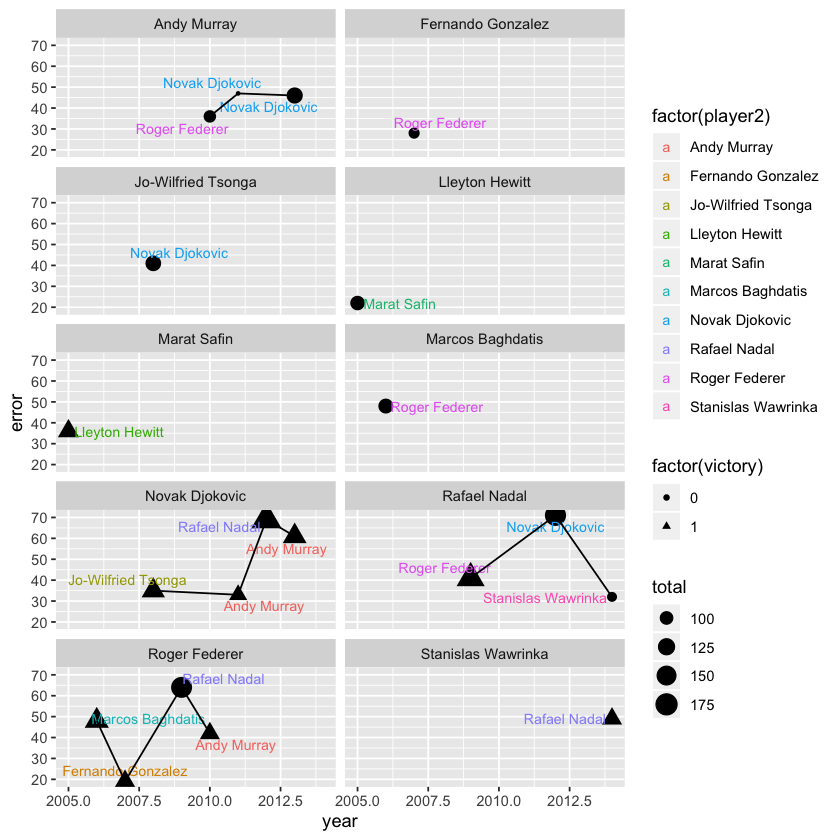

In [369]:
p = ggplot(sample_file, aes(year, error))

ans = p + 
geom_point(aes(shape=factor(victory), size=total)) +
geom_text_repel(aes(colour=factor(player2),label=player2), size=3) +
facet_wrap(~player, ncol = 2) +
geom_line()
suppressMessages(print(ans))